# Avaliação de Desempenho do Protocolo TCP em condições de congestionamento: cubic x reno 
 
**Alunos:** 
 - João Negri, 
 - Matheus Medeiros, 
 - Vinicius Tonini

## imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns  # Optional for styling

## Abertura dos dados e pré tratamento

In [24]:
n = 8

df = pd.read_csv('cliente.csv')


print(df.head())

cubics = df[df['proto'].str.contains('cubic',case=False)]

renos = df[df['proto'].str.contains('reno',case=False)]

media_cubic = cubics['bps'].mean()
# print('Cubic obteve uma média de transmissão de ',np.round(media_cubic/1000000,2) ,'Mbps')
media_reno = renos['bps'].mean()
# print('Reno obteve uma média de transmissão de ',np.round(media_reno/1000000,2),'Mbps')

# print('Reno está com uma eficácia de ',renos['bps'].mean() / cubics['bps'].mean() *100,'%')

t = 3.4995 #tabela 99% de confiança e 8 repeticoes
# np.random.standard_t()

# scipy.stats.

   rep proto      ber  e2e_delay         vel                time    addrsrc  \
0    0  reno   100000      10000  500000kbps  20230919210244.374  10.0.3.20   
1    0  reno   100000     100000  500000kbps  20230919210429.102  10.0.3.20   
2    0  reno   100000      10000  700000kbps  20230919210510.177  10.0.3.20   
3    0  reno   100000     100000  700000kbps  20230919210655.692  10.0.3.20   
4    0  reno  1000000      10000  500000kbps  20230919210737.919  10.0.3.20   

   portsrc   addrdest  portdest  nsei    nsei.1  transfbits         bps  
0  49956.0  10.0.0.20    5001.0   3.0  0.0-30.3  15073280.0   3978405.0  
1  55140.0  10.0.0.20    5001.0   3.0  0.0-31.2   1835008.0    470320.0  
2  54804.0  10.0.0.20    5001.0   3.0  0.0-30.1  11534336.0   3061956.0  
3  33684.0  10.0.0.20    5001.0   3.0  0.0-32.4   1966080.0    485497.0  
4  48658.0  10.0.0.20    5001.0   3.0  0.0-30.2  86245376.0  22851239.0  


## Pequeno resumo da área e objetivo

* avaliar o comportamento de dois algoritmos de controle de congestionamento (cubic e reno)

## Métricas usadas para ADS

Taxa de transmissão média

## Parâmetros Fixados

- Trafego de background: UDP
- Fluxo avaliado: TCP
- Link entre dispositivos: 1Gbps
- Topologia a seguir:


![Alt text](img/topologia.png)


## Fatores e Níveis

- Protocolos:
  - Cubic
  - Reno
- BER: 
  - 1/1000000
  - 1/100000
- Tráfego de background:
  - 500000kbps
  - 700000kbps
- End to end delay:
  - 10000  us
  - 100000 us


## Técnicas usadas para avaliação

Simulação utilizando Imunes2 e Iperf.

## Resultados

3.491880375 Mbps


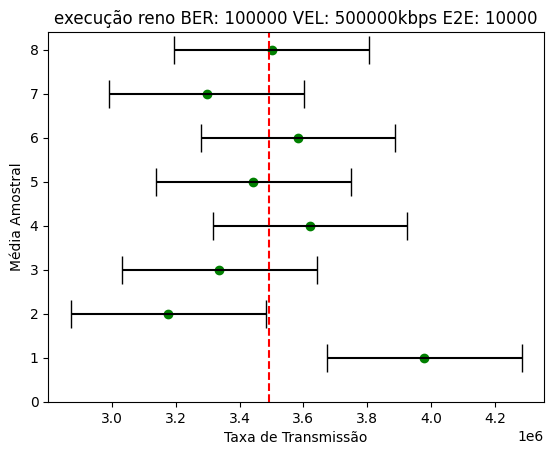

0.39321885714285715 Mbps


/home/joaonegri/aulas/ADS/miniprojeto1/ADS/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/home/joaonegri/aulas/ADS/miniprojeto1/ADS/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


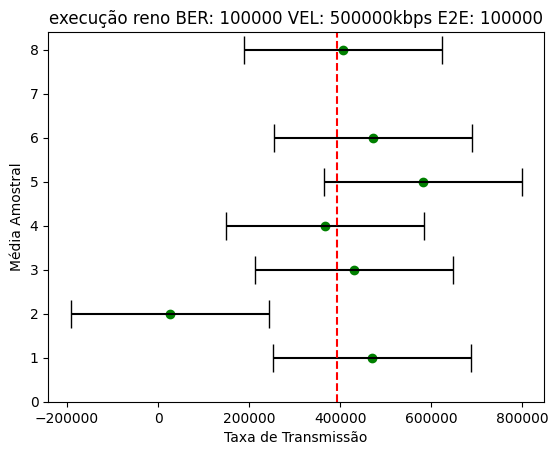

3.365184125 Mbps


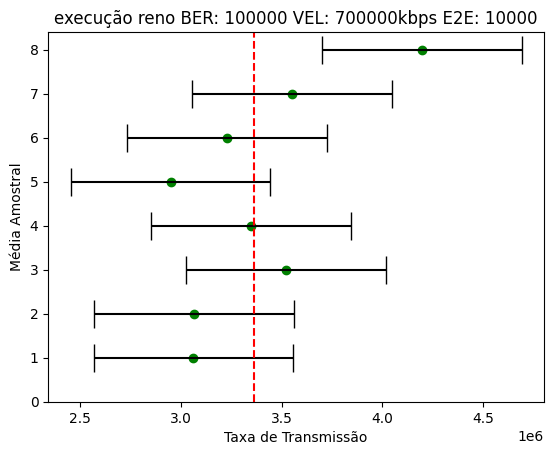

0.5224254 Mbps


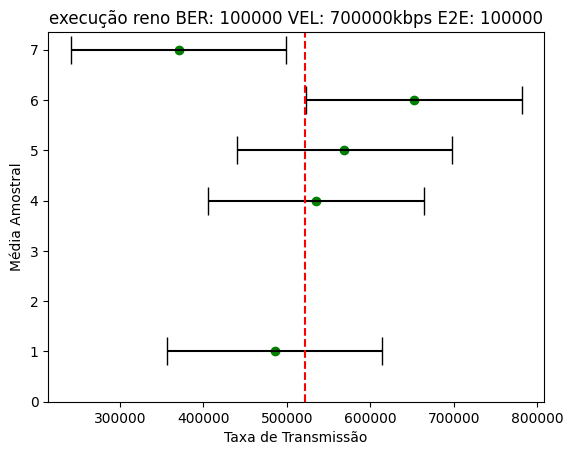

19.9679055 Mbps


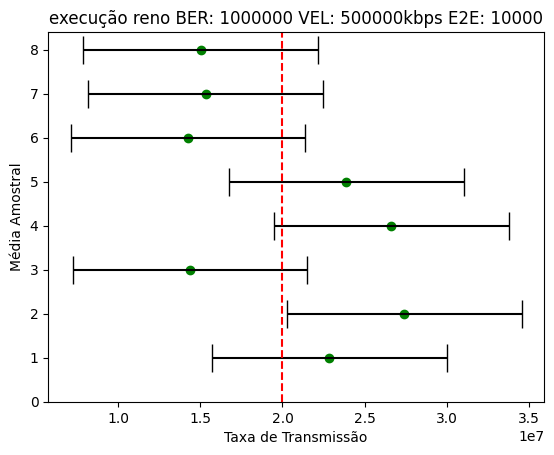

1.9258148 Mbps


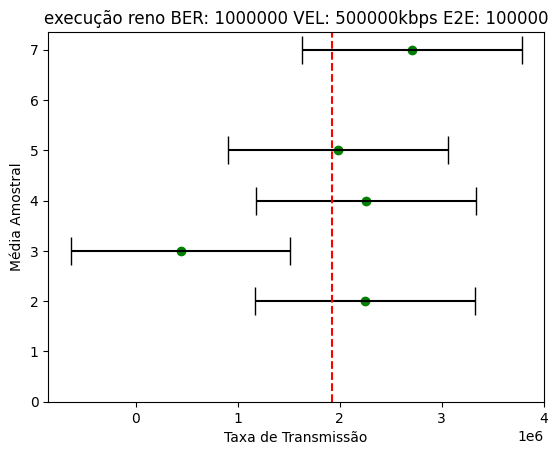

19.20103285714286 Mbps


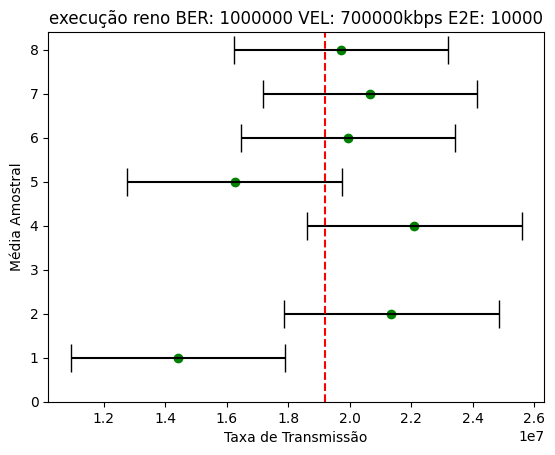

3.241536857142857 Mbps


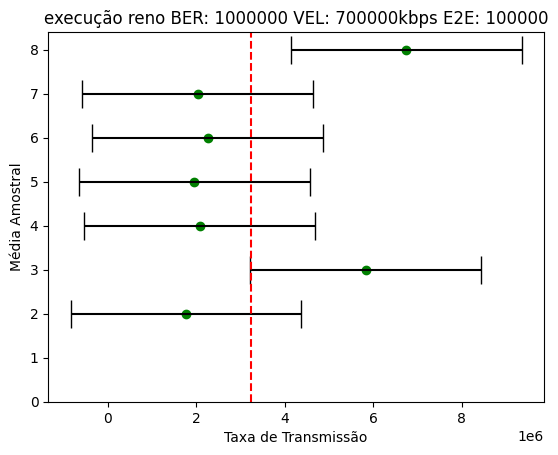

3.279197 Mbps


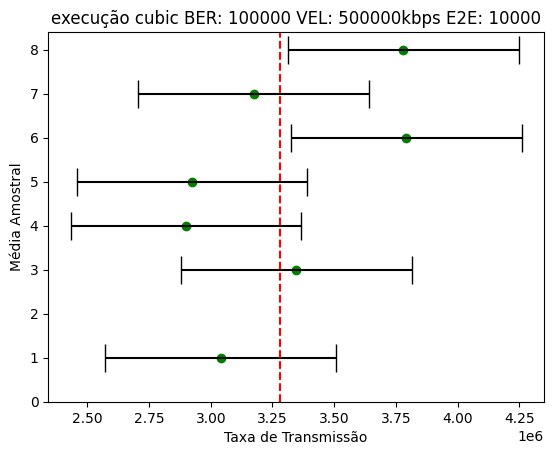

0.401208 Mbps


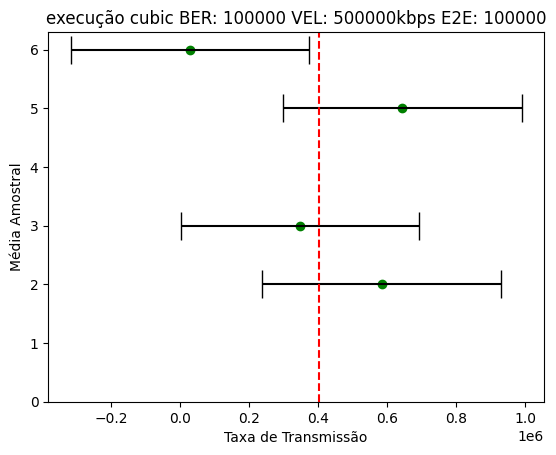

3.042530125 Mbps


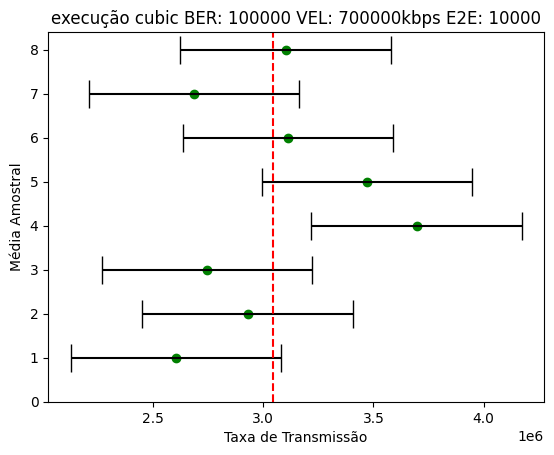

0.46967314285714284 Mbps


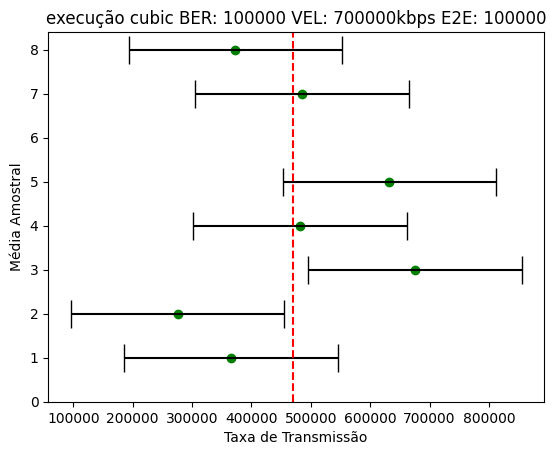

28.008985142857142 Mbps


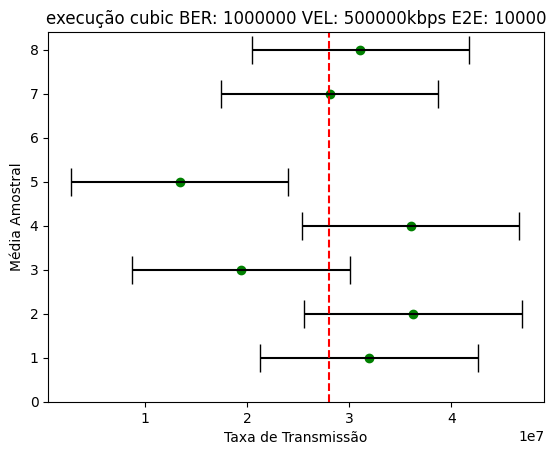

4.322045833333333 Mbps


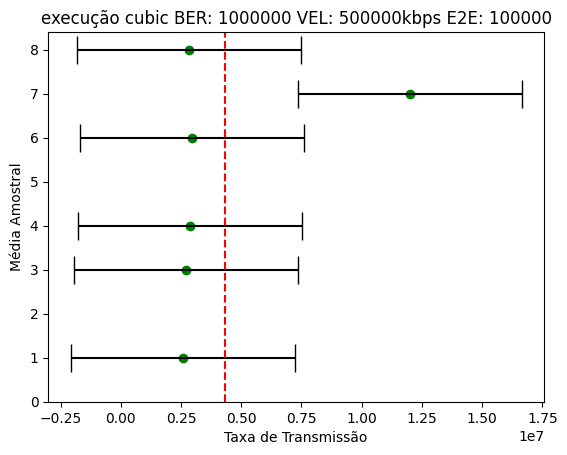

22.444176625 Mbps


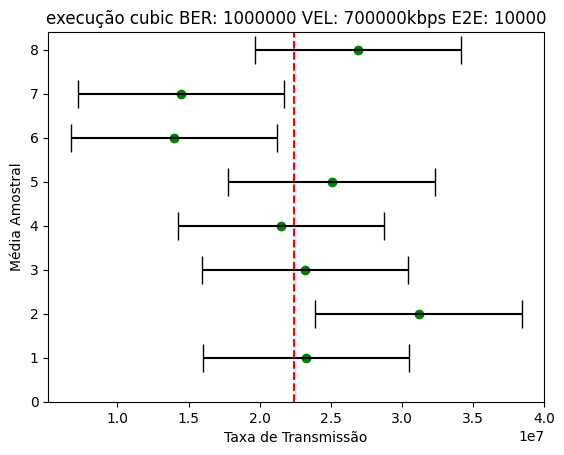

5.335202 Mbps


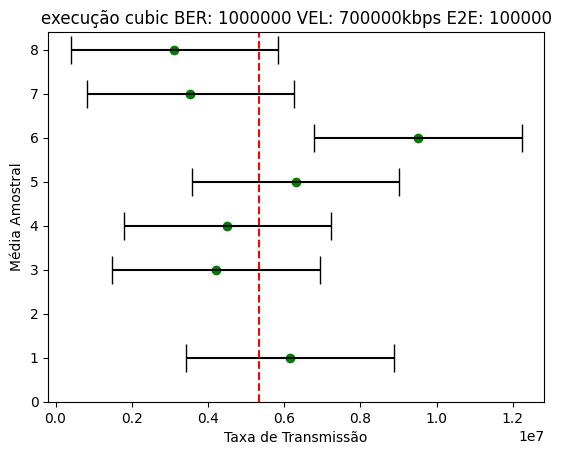

In [25]:
cubic = []
reno = []
for proto in df['proto'].unique():
    for ber in df['ber'].unique():
        for vel in df['vel'].unique():
            for e2e in df['e2e_delay'].unique():
                
                df_filtrado = df[(df['proto'] == proto) & (df['ber'] == ber) & (df['e2e_delay'] == e2e) & (df['vel'] == vel)]
                intervalo = t*(df_filtrado['bps'].std()/np.sqrt(len(df_filtrado['bps'])))

                intervalo_inf = df_filtrado['bps'].mean() - t*(df_filtrado['bps'].std()/np.sqrt(len(df_filtrado['bps'])))
                intervalo_sup = df_filtrado['bps'].mean() + t*(df_filtrado['bps'].std()/np.sqrt(len(df_filtrado['bps'])))
                # print('desvio padrao = ',df_filtrado['bps'].std())
                # print('limite inferior do intervalo',np.round(intervalo_inf/1000000,2),'Mbps')
                # print('limite superior do intervalo',np.round(intervalo_sup/1000000,2),'Mbps')
                count = 0
                for i, r in df_filtrado.iterrows():
                    count += 1
                    plt.bar( r['bps'],count, xerr=intervalo, align='center', alpha=0.5, ecolor='black', capsize=10)
                    plt.scatter( r['bps'], count, color='g')

                plt.axvline(df_filtrado['bps'].mean(), ls='--', color='r')
                print(df_filtrado['bps'].mean()/1000000,'Mbps')
                plt.ylabel('Média Amostral')
                plt.xlabel('Taxa de Transmissão')
                plt.title(f'execução {proto} BER: {ber} VEL: {vel} E2E: {e2e}')
                plt.show()

                if proto == 'cubic':
                    cubic.append(np.round(df_filtrado['bps'].mean()/1000000,2))
                else:
                    reno.append(np.round(df_filtrado['bps'].mean()/1000000,2))


***
### **Análise dos dados**

A simulação que obteve a **melhor** taxa de transmissão tem os seguintes parâmetros: 
- BER: 1/1000000
- Protocolo: Cubic
- Tráfego de background: 500000kbps 
- End to end delay: 10000 us

Ele obteve a taxa de transmissão de :

![Alt text](img/melhor.png)


A simulação que obteve a **pior** taxa de transmissão tem os seguintes parâmetros: 
- BER: 1/100000
- Protocolo: Reno
- Tráfego de background: 500000kbps 
- End to end delay: 100000 us

Ele obteve a taxa de transmissão de :

![Alt text](img/pior.png)

Comparando as simulações Reno e Cubic é possível analisar que 

| Cubic (Mbps)  | Reno (Mbps)  |
|--------|-------|
| 3.1    | 3.53  |
| 0.47   | 0.32  |
| 2.76   | 3.25  |
| 0.44   | 0.51  |
| 29.18  | 22.81 |
| 2.65   | 1.65  |
| 25.88  | 19.28 |
| 5.19   | 3.23  |


In [26]:
cubic

[3.28, 0.4, 3.04, 0.47, 28.01, 4.32, 22.44, 5.34]

In [27]:
reno

[3.49, 0.39, 3.37, 0.52, 19.97, 1.93, 19.2, 3.24]